Гузь Владислав, лабораторна 2.

In [1]:
import numpy as np

Інформація про дані:

In [5]:
f = open('cmc.names')
print(*f.readlines())
f.close()

1. Title: Contraceptive Method Choice
 
 2. Sources:
    (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                 Contraceptive Prevalence Survey
    (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
    (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
    (c) Date:    June 7, 1997
 
 3. Past Usage:
    Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
    Prediction Accuracy, Complexity, and Training Time of Thirty-three
    Old and New Classification Algorithms. Machine Learning. Forthcoming.
    (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
    (http://www.stat.wisc.edu/~limt/mach1317.pdf)
 
 4. Relevant Information:
    This dataset is a subset of the 1987 National Indonesia Contraceptive
    Prevalence Survey. The samples are married women who were either not 
    pregnant or do not know if they were at the time of interview. The 
    problem is to predict the current contraceptive method choice 
    (no use, long-term met

Зазначено, що пропущених даних немає. Перетворимо ці дані в масив numpy.

In [13]:
f = open('cmc.data')
data = f.readlines()
f.close()
for i in range(len(data)):
  data[i] = data[i][:-1]
  data[i] = data[i].split(',')
data = np.array(data, dtype=np.int)
np.random.shuffle(data)
data

array([[26,  3,  4, ...,  3,  0,  3],
       [48,  4,  3, ...,  4,  0,  2],
       [19,  2,  2, ...,  2,  0,  1],
       ...,
       [24,  4,  4, ...,  3,  0,  3],
       [33,  4,  4, ...,  3,  0,  3],
       [30,  3,  3, ...,  2,  0,  3]])

Виділяємо features та залежну змінну.

In [21]:
x, y = data[:, :-1], data[:, -1:].reshape(data.shape[0])

Спочатку, скористаємося аналізом двох головних компонент і одразу проведемо факторний аналіз. Тобто, сперш подивимось, як кластеризуються класи, які треба класифікувати, а потім подивимось, як кластеризуються дані по факторній змінній.

Кластери залежної змінної:

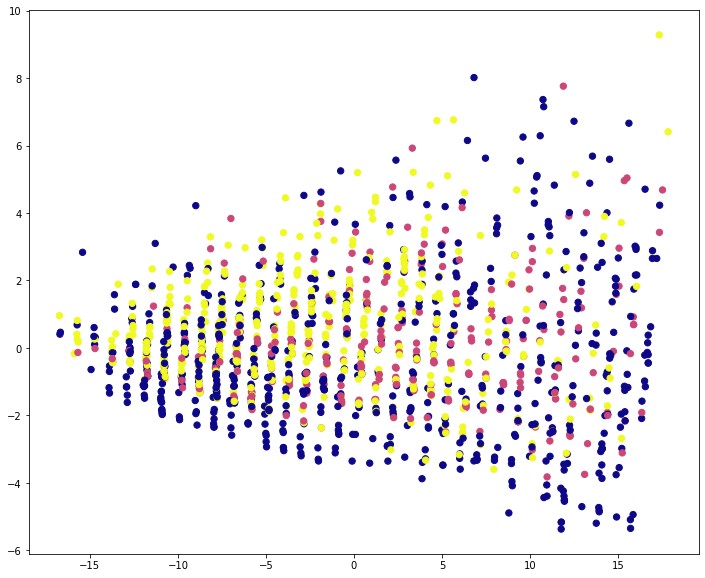

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
transformed = pca.fit_transform(x)

plt.figure(figsize=(12, 10))
plt.scatter(transformed[:, :1].reshape(1, transformed.shape[0])[0], transformed[:, 1:].reshape(1, transformed.shape[0])[0], s=40, c=y, cmap='plasma')
plt.show()

Кластери факторної змінної:

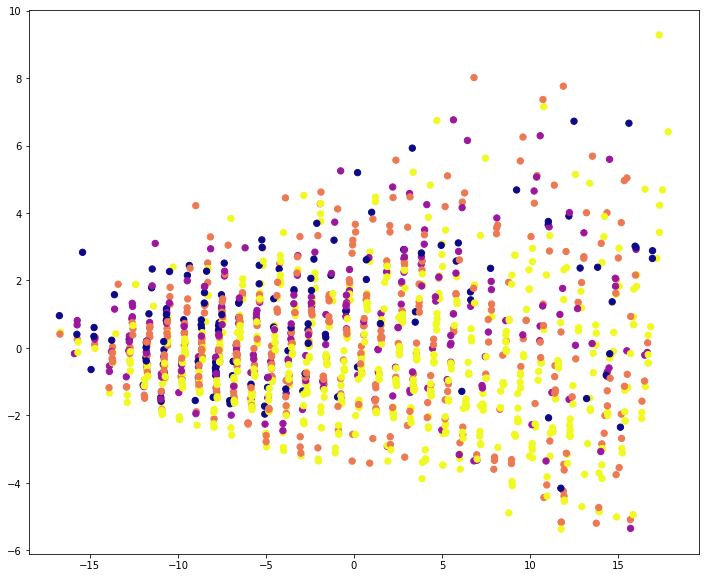

In [31]:
faktor = data[:, 7:8].reshape(data.shape[0])

plt.figure(figsize=(12, 10))
plt.scatter(transformed[:, :1].reshape(1, transformed.shape[0])[0], transformed[:, 1:].reshape(1, transformed.shape[0])[0], s=40, c=faktor, cmap='plasma')
plt.show()

Розбиваємо вибірку на тренувальну та тестову.

In [40]:
trainx, trainy, testx, testy = x[:1176], y[:1176], x[1176:], y[1176:]

from sklearn.metrics import accuracy_score

Використаємо логістичну регресію:

In [42]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l2').fit(trainx, trainy)
predy = LR.predict(testx)
print('Logistic Regression: {} % accuracy.\n\n\n'.format(accuracy_score(testy, predy)))

Logistic Regression: 0.5016835016835017 % accuracy.





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Наївний баєсівський класифікатор:

In [76]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB().fit(trainx, trainy)
predy = NB.predict(testx)
print('Naive Bayes: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

Naive Bayes: 44.78114478114478 % accuracy.


Дерево рішень:

In [77]:
from sklearn.tree import DecisionTreeClassifier

TREE = DecisionTreeClassifier().fit(trainx, trainy)
predy = TREE.predict(testx)
print('Decision Tree: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

Decision Tree: 42.76094276094276 % accuracy.


Ада буст:



In [78]:
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier(n_estimators=50, learning_rate=0.7).fit(trainx, trainy)
predy = ADA.predict(testx)
print('Ada Boost: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

Ada Boost: 57.23905723905723 % accuracy.


Випадковий ліс:

In [79]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=150).fit(trainx, trainy)
predy = RFC.predict(testx)
print('Random Forest: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

Random Forest: 50.505050505050505 % accuracy.


k найближчих сусідів. Використаємо k = 3, 5, 7, 9, 11.

In [80]:
from sklearn.neighbors import KNeighborsClassifier

KNN_3 = KNeighborsClassifier(n_neighbors=3).fit(trainx, trainy)
predy = KNN_3.predict(testx)
print('3 Nearest Neighbours: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

KNN_5 = KNeighborsClassifier(n_neighbors=5).fit(trainx, trainy)
predy = KNN_5.predict(testx)
print('5 Nearest Neighbours: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

KNN_7 = KNeighborsClassifier(n_neighbors=7).fit(trainx, trainy)
predy = KNN_7.predict(testx)
print('7 Nearest Neighbours: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

KNN_9 = KNeighborsClassifier(n_neighbors=9).fit(trainx, trainy)
predy = KNN_9.predict(testx)
print('9 Nearest Neighbours: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

KNN_11 = KNeighborsClassifier(n_neighbors=11).fit(trainx, trainy)
predy = KNN_11.predict(testx)
print('11 Nearest Neighbours: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

3 Nearest Neighbours: 47.13804713804714 % accuracy.
5 Nearest Neighbours: 47.13804713804714 % accuracy.
7 Nearest Neighbours: 54.20875420875421 % accuracy.
9 Nearest Neighbours: 50.16835016835017 % accuracy.
11 Nearest Neighbours: 51.515151515151516 % accuracy.


Подивимось ще k = 6, 8.

In [81]:
KNN_6 = KNeighborsClassifier(n_neighbors=6).fit(trainx, trainy)
predy = KNN_6.predict(testx)
print('6 Nearest Neighbours: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

KNN_8 = KNeighborsClassifier(n_neighbors=8).fit(trainx, trainy)
predy = KNN_8.predict(testx)
print('8 Nearest Neighbours: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

6 Nearest Neighbours: 49.494949494949495 % accuracy.
8 Nearest Neighbours: 51.178451178451176 % accuracy.


І наостанок - опорні вектори.

Розглянемо 4 різні ядра: лінійне, поліноміальне, сигмоїду та rbf.

Також, розглянемо різні значення параметра C = 0.5, 1, 2 (для rbf ще й 4, 6).

Побудуємо відповідно 14 моделей:

In [102]:
from sklearn.svm import SVC

SVC_linear_1 = SVC(C=0.5, kernel='linear').fit(trainx, trainy)
predy = SVC_linear_1.predict(testx)
print('Support Vector Machone, kernel - linear, C = 0.5: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_linear_2 = SVC(C=1, kernel='linear').fit(trainx, trainy)
predy = SVC_linear_2.predict(testx)
print('Support Vector Machone, kernel - linear, C = 1: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_linear_3 = SVC(C=2, kernel='linear').fit(trainx, trainy)
predy = SVC_linear_3.predict(testx)
print('Support Vector Machone, kernel - linear, C = 2: {} % accuracy.\n'.format(100*accuracy_score(testy, predy)))

SVC_poly_1 = SVC(C=0.5, kernel='poly').fit(trainx, trainy)
predy = SVC_poly_1.predict(testx)
print('Support Vector Machone, kernel - polynomial, C = 0.5: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_poly_2 = SVC(C=1, kernel='poly').fit(trainx, trainy)
predy = SVC_poly_2.predict(testx)
print('Support Vector Machone, kernel - polynomial, C = 1: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_poly_3 = SVC(C=2, kernel='poly').fit(trainx, trainy)
predy = SVC_poly_3.predict(testx)
print('Support Vector Machone, kernel - polynomial, C = 2: {} % accuracy.\n'.format(100*accuracy_score(testy, predy)))

SVC_rbf_1 = SVC(C=0.5, kernel='rbf').fit(trainx, trainy)
predy = SVC_rbf_1.predict(testx)
print('Support Vector Machone, kernel - rbf, C = 0.5: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_rbf_2 = SVC(C=1, kernel='rbf').fit(trainx, trainy)
predy = SVC_rbf_2.predict(testx)
print('Support Vector Machone, kernel - rbf, C = 1: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_rbf_3 = SVC(C=2, kernel='rbf').fit(trainx, trainy)
predy = SVC_rbf_3.predict(testx)
print('Support Vector Machone, kernel - rbf, C = 2: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_rbf_4 = SVC(C=4, kernel='rbf').fit(trainx, trainy)
predy = SVC_rbf_4.predict(testx)
print('Support Vector Machone, kernel - rbf, C = 4: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_rbf_5 = SVC(C=6, kernel='rbf').fit(trainx, trainy)
predy = SVC_rbf_5.predict(testx)
print('Support Vector Machone, kernel - rbf, C = 6: {} % accuracy.\n'.format(100*accuracy_score(testy, predy)))

SVC_sigmoid_1 = SVC(C=0.5, kernel='sigmoid').fit(trainx, trainy)
predy = SVC_sigmoid_1.predict(testx)
print('Support Vector Machone, kernel - polynomial, C = 0.5: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_sigmoid_2 = SVC(C=1, kernel='sigmoid').fit(trainx, trainy)
predy = SVC_sigmoid_2.predict(testx)
print('Support Vector Machone, kernel - polynomial, C = 1: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

SVC_sigmoid_3 = SVC(C=2, kernel='sigmoid').fit(trainx, trainy)
predy = SVC_sigmoid_3.predict(testx)
print('Support Vector Machone, kernel - polynomial, C = 2: {} % accuracy.'.format(100*accuracy_score(testy, predy)))

Support Vector Machone, kernel - linear, C = 0.5: 52.18855218855219 % accuracy.
Support Vector Machone, kernel - linear, C = 1: 51.85185185185185 % accuracy.
Support Vector Machone, kernel - linear, C = 2: 51.85185185185185 % accuracy.

Support Vector Machone, kernel - polynomial, C = 0.5: 44.78114478114478 % accuracy.
Support Vector Machone, kernel - polynomial, C = 1: 47.474747474747474 % accuracy.
Support Vector Machone, kernel - polynomial, C = 2: 48.821548821548824 % accuracy.

Support Vector Machone, kernel - rbf, C = 0.5: 51.178451178451176 % accuracy.
Support Vector Machone, kernel - rbf, C = 1: 53.87205387205387 % accuracy.
Support Vector Machone, kernel - rbf, C = 2: 54.20875420875421 % accuracy.
Support Vector Machone, kernel - rbf, C = 4: 55.218855218855225 % accuracy.
Support Vector Machone, kernel - rbf, C = 6: 55.55555555555556 % accuracy.

Support Vector Machone, kernel - polynomial, C = 0.5: 23.232323232323232 % accuracy.
Support Vector Machone, kernel - polynomial, C 

Висновок.

Аналіз головних компонент показав деякі кластери для залежної змінної. Вони не ідеальні, але схоже на те що класи намагаються кластеризуватись. Приблизно той самий результат отримано і при аналізі факторної змінної.

Далі підуть результати натренованих моделей:


*   Логістична регресія - 50%;
*   Наївний баєсівський класифікатор - 44.8%;
*   Дерево рішень - 42.8%;
*   Ада буст - 57.2%;
*   Випадковий ліс - 50.5%;
*   Найближчі сусіди - 54.2% (для 7 сусідів);
*   Машина опорних векторів - 55.6% (rbf, C = 6).

Найкращими були моделі: Ада буст (це очікувано, бо на аналізі головних компонент не було дуже багато викидів), найближчі сусіди (7), машина опорних векторів (ядро rbf тут спрацювало найкраще).

